In [95]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

In [96]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [97]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [98]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [99]:
df.shape

(214, 10)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [101]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Summarize data

In [102]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [103]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [104]:
columHead = df.columns.tolist()
print(columHead)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


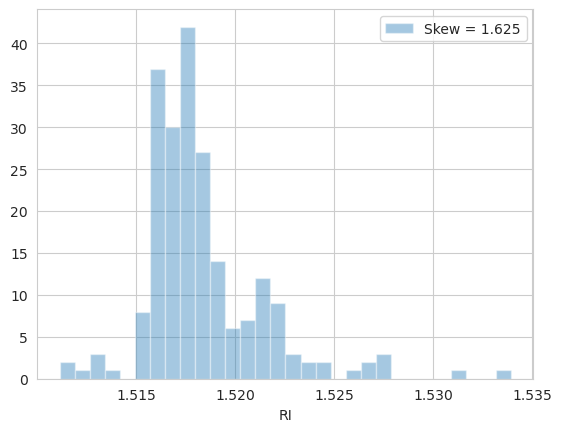

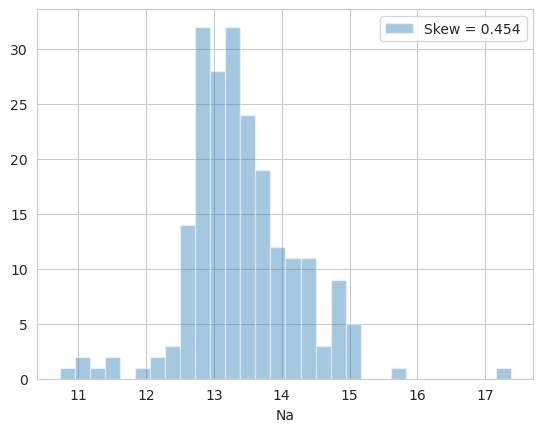

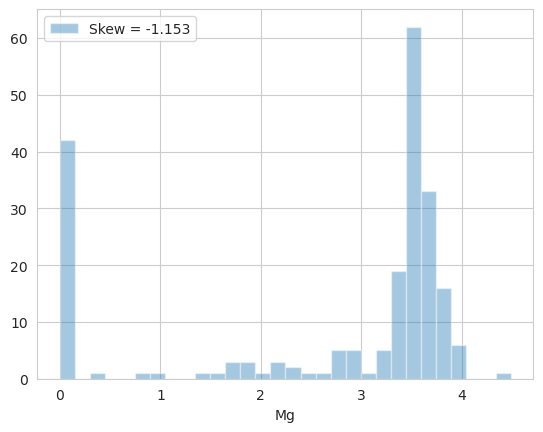

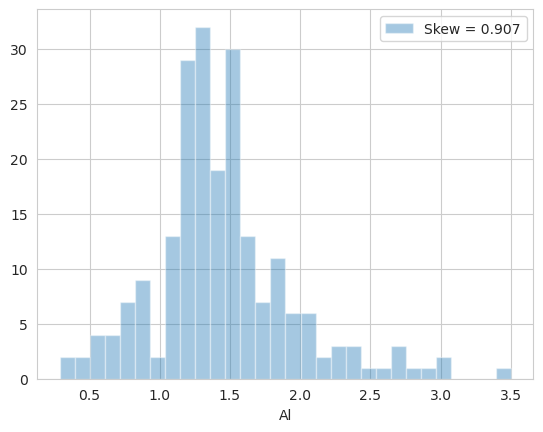

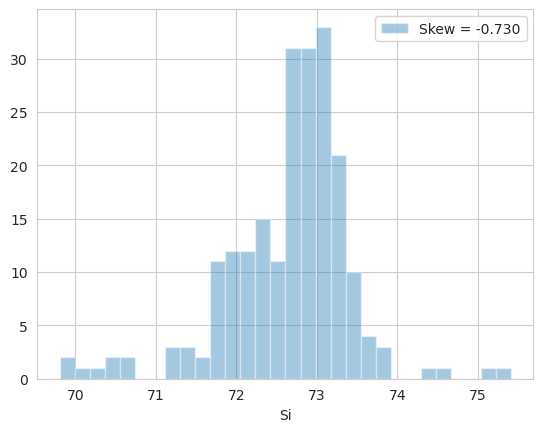

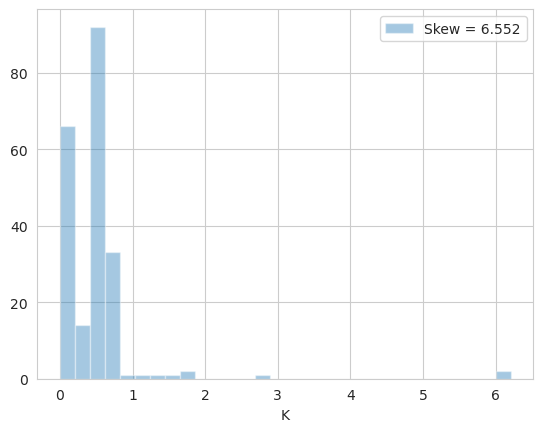

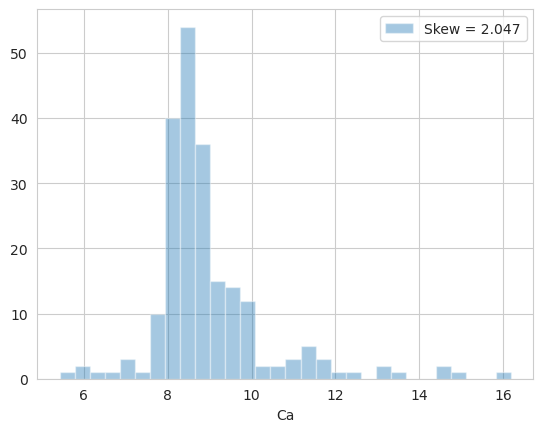

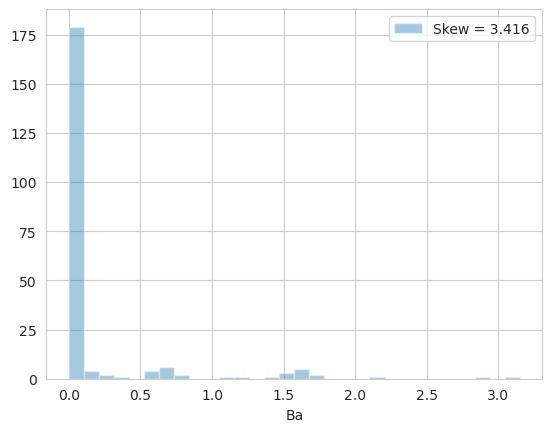

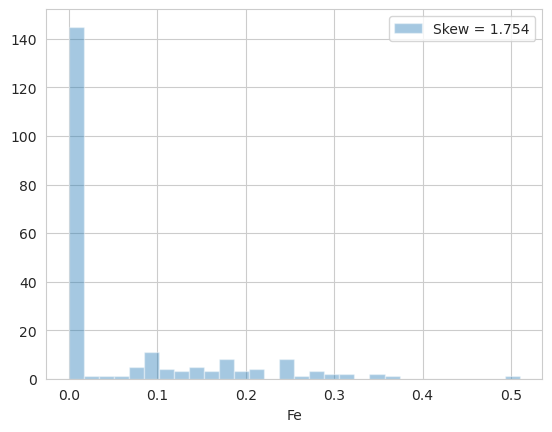

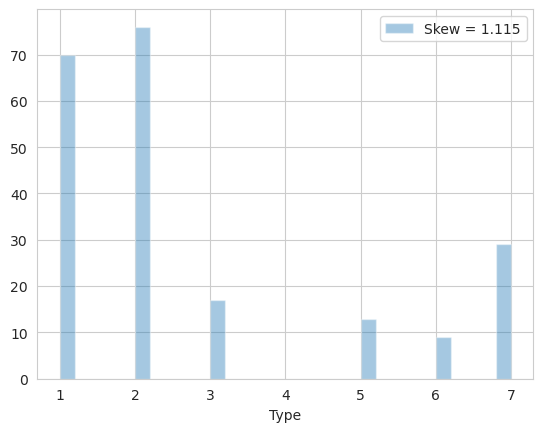

In [105]:
#Univariate plots
for i in columHead:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [106]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of columHead and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over columHead(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[columHead]))))

The dataset contains 25 observations with more than 2 outliers


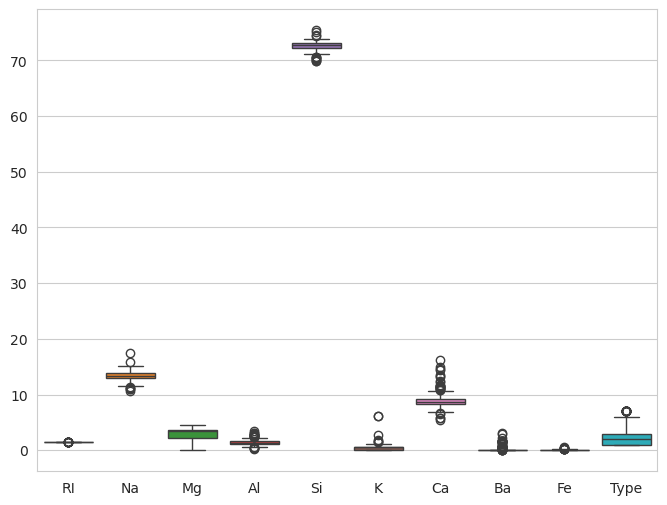

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(df[columHead])
plt.show()

<Figure size 800x800 with 0 Axes>

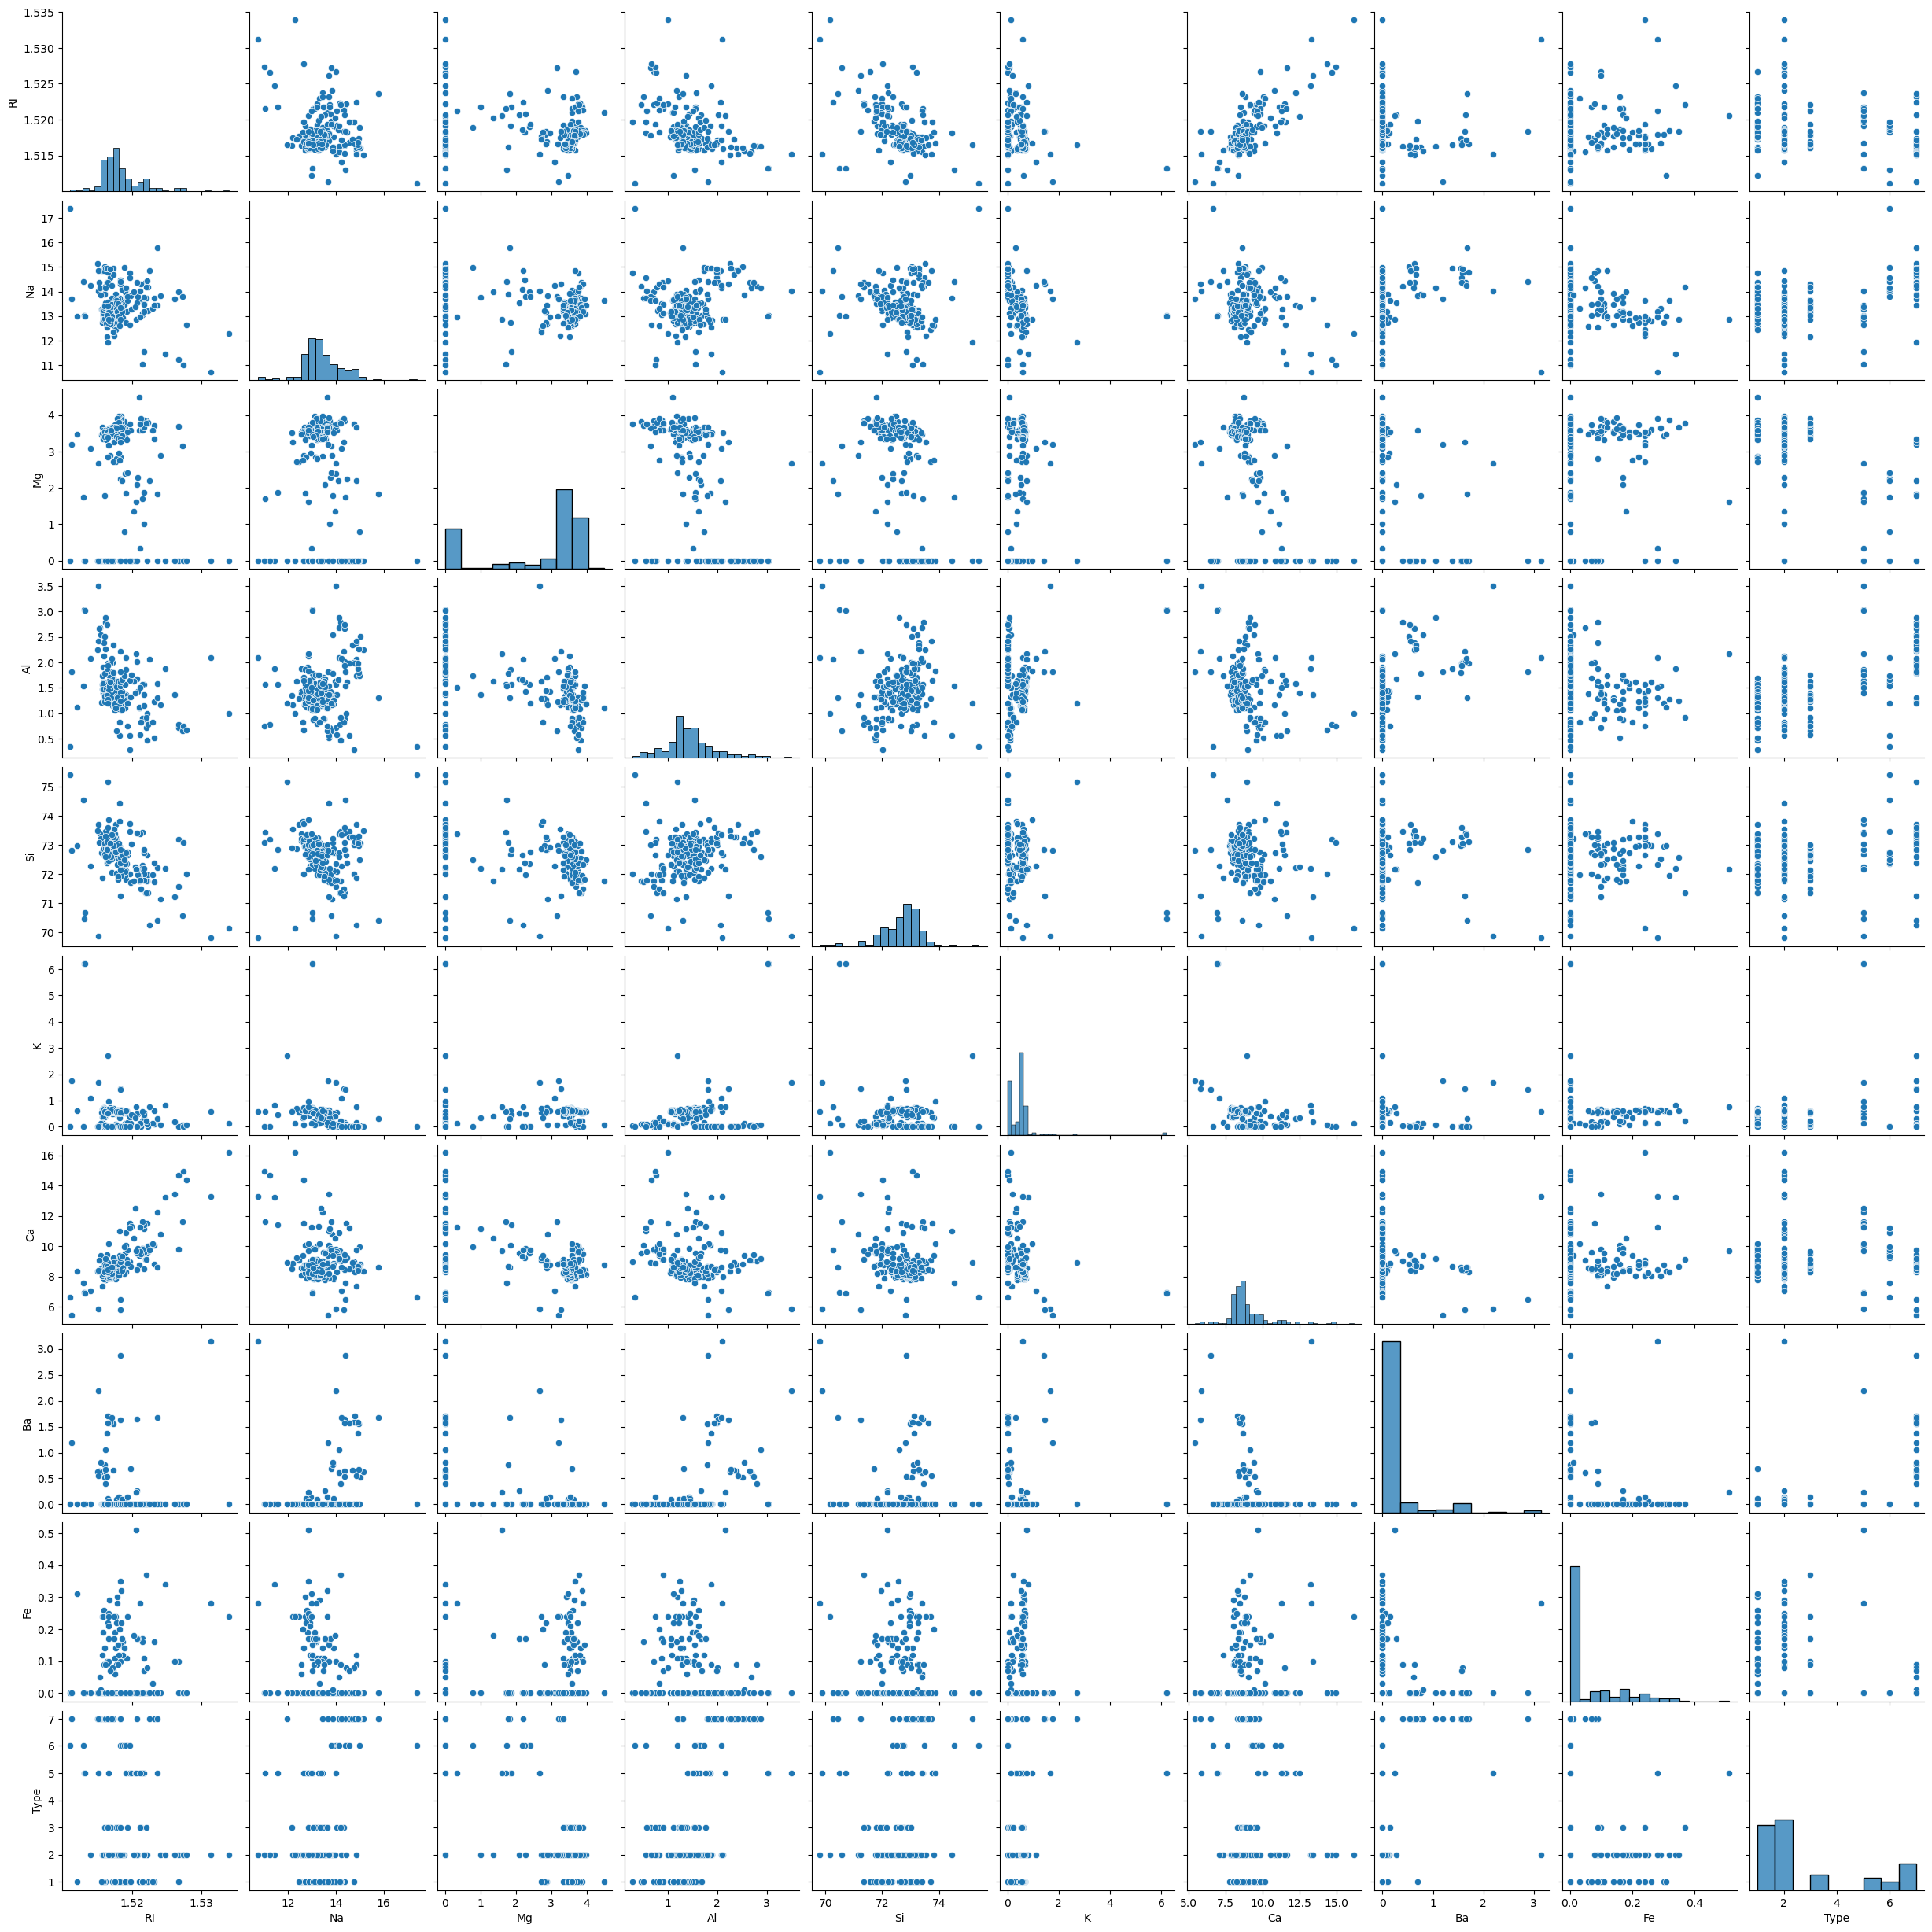

In [38]:
#Multivariate plots
plt.figure(figsize=(8,8))
sns.pairplot(df[columHead],palette='coolwarm')
plt.show()

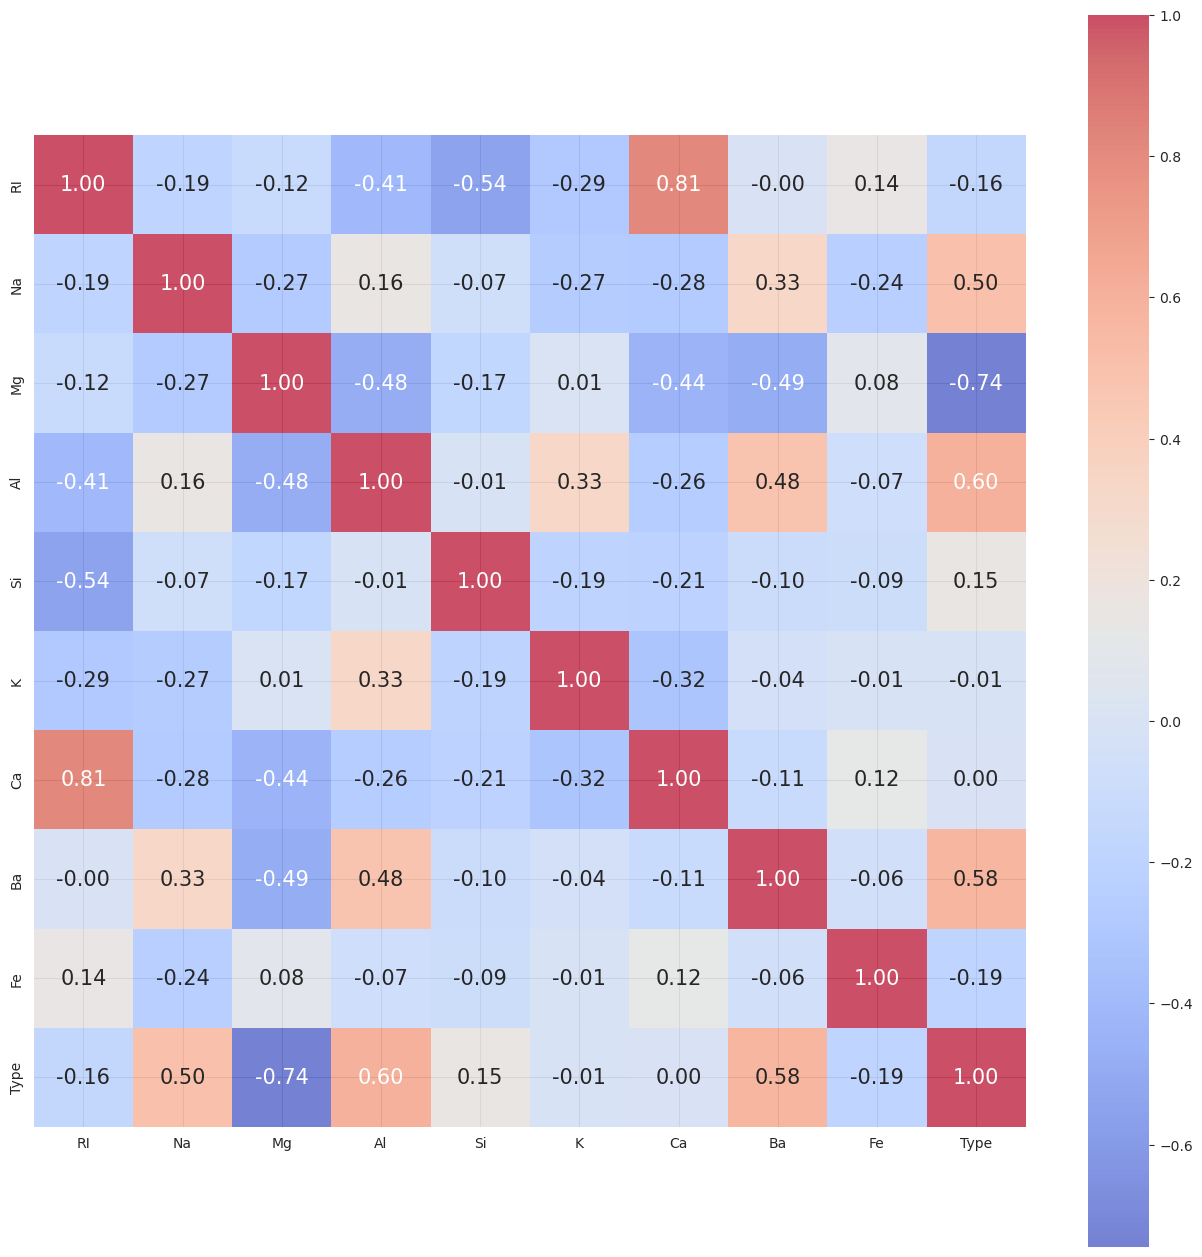

In [108]:
corr = df[columHead].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= columHead, yticklabels= columHead, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [109]:
outlier_indices = outlier_hunt(df[columHead])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(189, 10)


In [110]:
df['Type'].value_counts()

Type
1    70
2    70
3    17
7    14
5    10
6     8
Name: count, dtype: int64

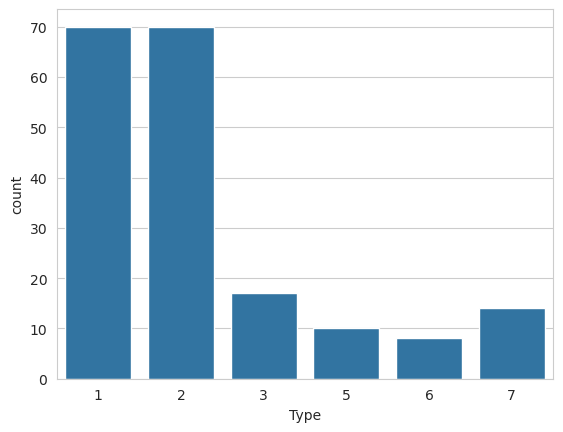

In [120]:
sns.countplot(df,x="Type")
plt.show()

In [126]:
# Define X as columHead and y as lablels
X = df[columHead]
y = df['Type']

#X=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values
#y=df['Type'].values

# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [127]:
features_boxcox = []

for feature in columHead:
    bc_transformed, _ = boxcox(df[feature]+1)
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=columHead)
df_bc['Type'] = df['Type']

In [128]:
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,1.890000e+02,189.000000,189.000000,189.000000,1.890000e+02,189.000000,1.890000e+02,189.000000,189.000000,189.000000
mean,6.459654e-04,0.780721,31.662745,1.605878,1.903187e+26,0.678151,1.945260e-01,0.007418,0.020088,2.417989
std,1.087082e-19,0.001690,15.622371,0.469786,2.225648e+25,0.428477,6.372560e-07,0.020710,0.028997,1.818900
min,6.459654e-04,0.773374,0.000000,0.302322,1.156509e+26,0.000000,1.945235e-01,0.000000,0.000000,1.000000
25%,6.459654e-04,0.779539,23.654890,1.369248,1.761622e+26,0.208314,1.945256e-01,0.000000,0.000000,1.000000
50%,6.459654e-04,0.780494,38.034897,1.575799,1.923515e+26,0.855584,1.945260e-01,0.000000,0.000000,2.000000
75%,6.459654e-04,0.781672,40.803443,1.853590,2.037687e+26,0.963995,1.945264e-01,0.000000,0.052799,3.000000
max,6.459654e-04,0.784879,70.924449,2.843953,2.730696e+26,2.352345,1.945276e-01,0.069485,0.071663,7.000000


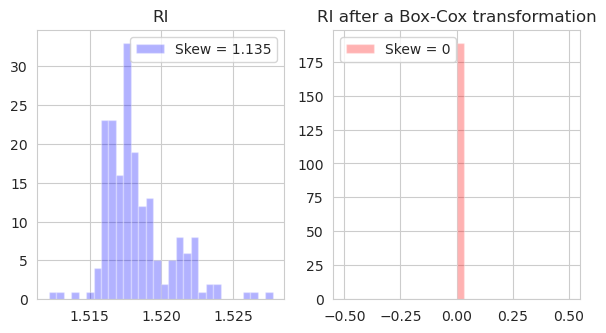

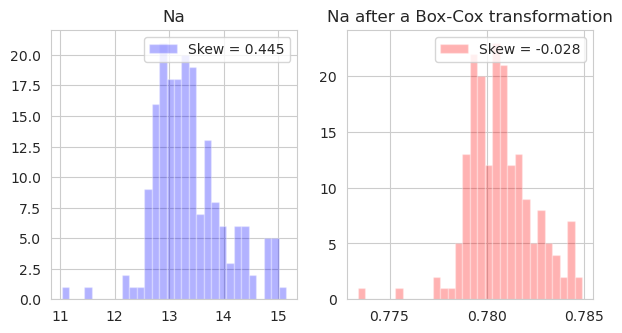

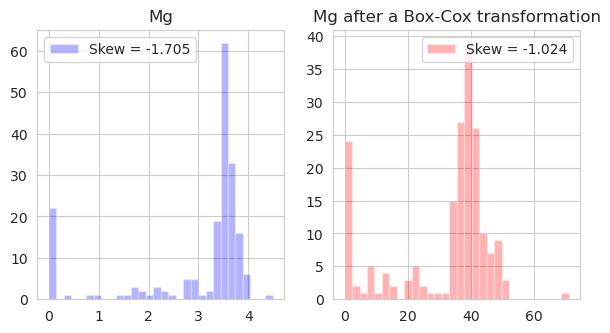

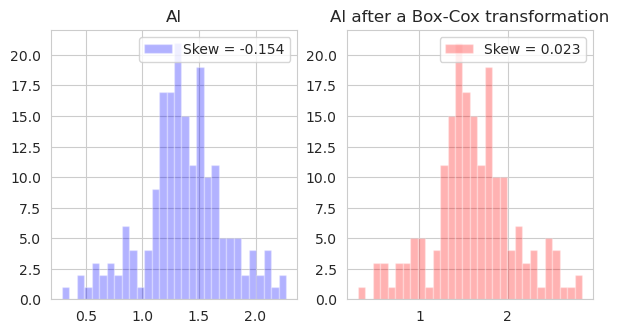

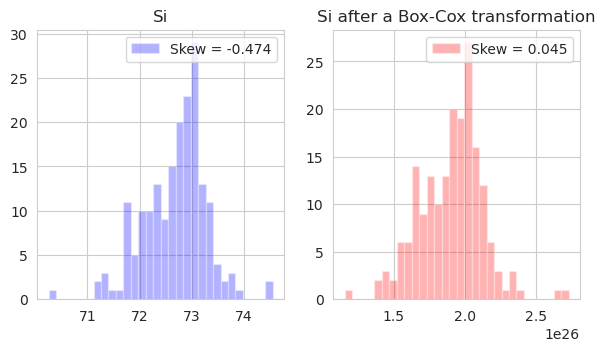

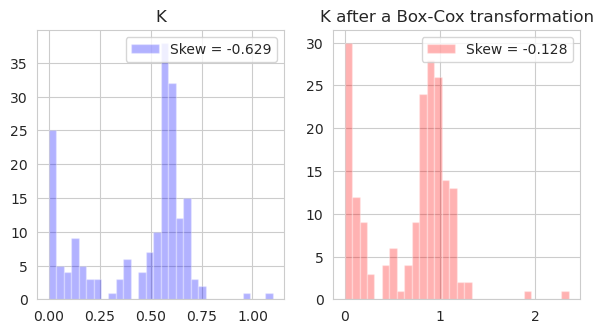

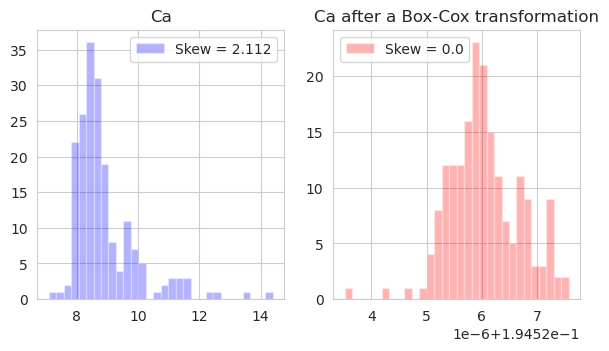

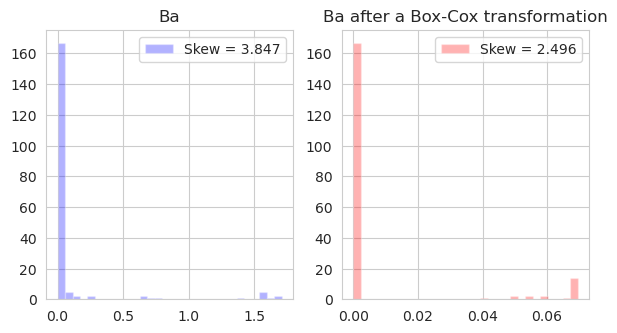

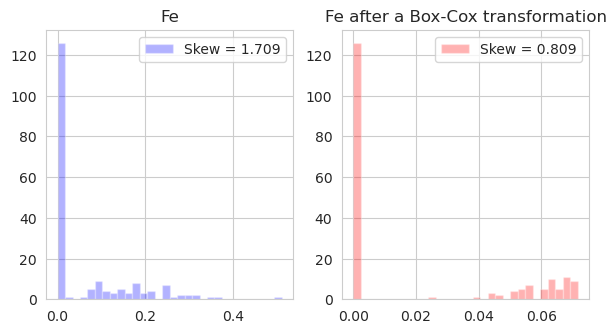

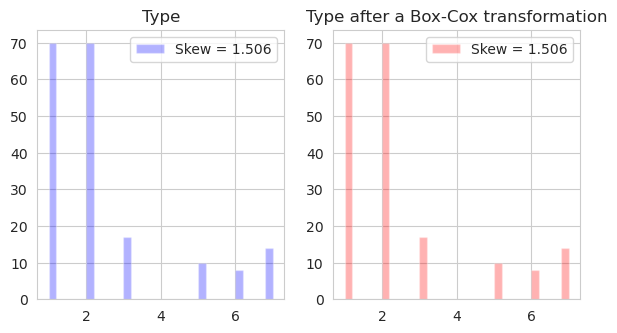

In [129]:
for feature in columHead:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [66]:
# check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Box-Cox transform' %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform
Feature Type is more skewed after a Box-Cox transform


In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

start = time()
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train.values, y_train)
print('Fit time : ', time() - start)

Fit time :  0.20461487770080566


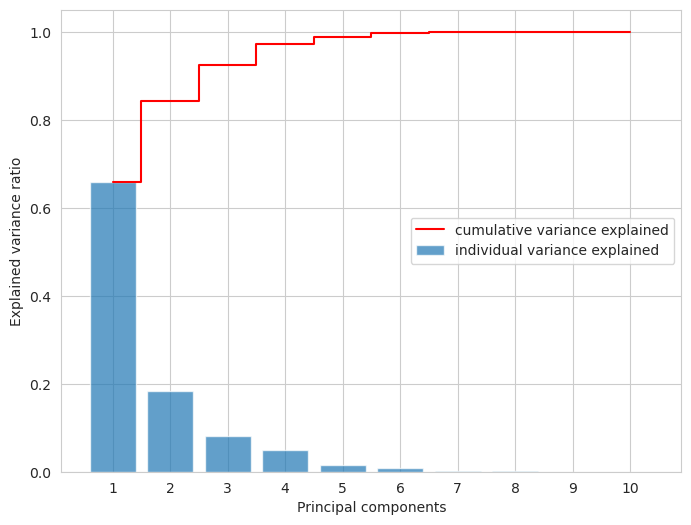

PC1 Cumulative variance: 65.958
PC2 Cumulative variance: 84.202
PC3 Cumulative variance: 92.334
PC4 Cumulative variance: 97.255
PC5 Cumulative variance: 98.863
PC6 Cumulative variance: 99.600
PC7 Cumulative variance: 99.845
PC8 Cumulative variance: 99.987
PC9 Cumulative variance: 100.000
PC10 Cumulative variance: 100.000


In [155]:
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    #print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))
    #print("dsdsd"(cum_var_exp[i]*100))
    print("PC" + str(i+1), "Cumulative variance: %.3f" %(cum_var_exp[i]*100))

SVC: 81.758242 (+/- 8.655547) performed in 0.038018 seconds
KNN: 75.000000 (+/- 10.141047) performed in 0.035876 seconds
RF: 98.516484 (+/- 2.969576) performed in 0.656088 seconds
Ada: 81.153846 (+/- 4.571019) performed in 0.927337 seconds
ET: 99.230769 (+/- 2.307692) performed in 0.584931 seconds
GB: 97.857143 (+/- 4.573660) performed in 1.486291 seconds
LR: 86.373626 (+/- 8.852124) performed in 0.086158 seconds


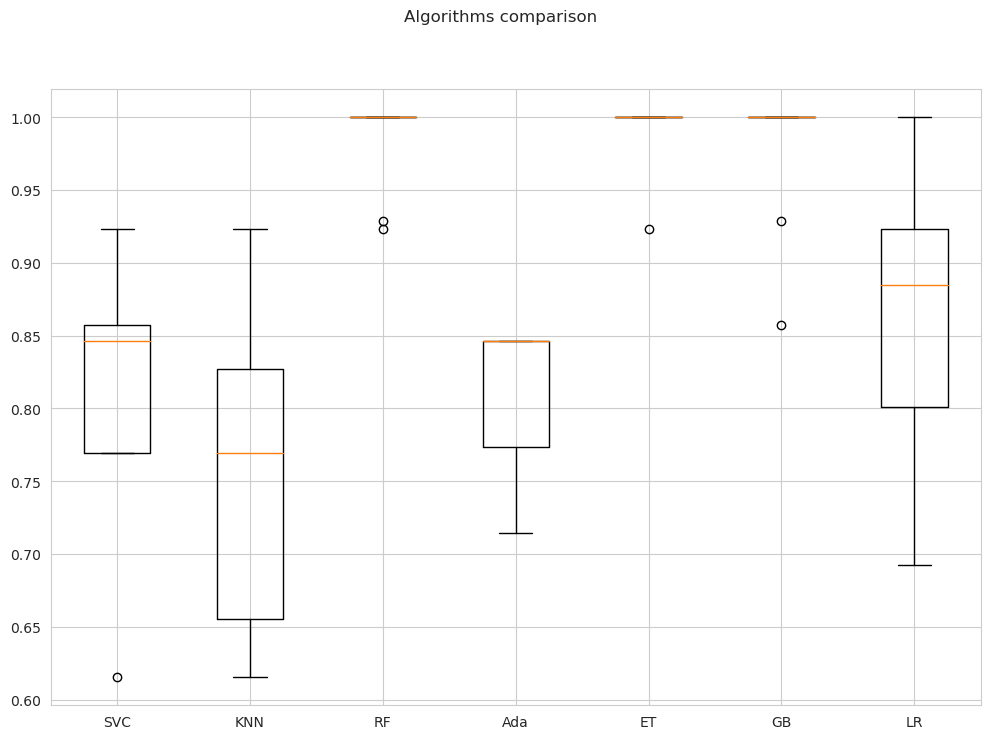

In [162]:
n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)

pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('SVC', SVC(random_state=seed))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) 
                   ]) ))


pipelines.append( ('Ada',
                   Pipeline([ 
                    ('Ada', AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                             ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators)) 
                   ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             ('GB', GradientBoostingClassifier(random_state=seed)) 
                   ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression(random_state=seed)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=7)
    #kfold = KFold(n_splits=5, shuffle=True, random_state=100)
    cv_results = cross_val_score(
        model, 
        X_train, y_train,
        cv=kfold, 
        scoring = scoring,
        n_jobs=-1
    ) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [164]:
# Create a pipeline with a Random forest classifier
pipe_rfc = Pipeline([ 
    ('rfc', RandomForestClassifier(random_state=seed, n_jobs=-1) )
])

# Set the grid parameters
param_grid_rfc =[{
    'rfc__n_estimators': [50, 100, 150], # number of estimators
    'rfc__max_features':[0.1, 0.2 , 0.3], # maximum features used at each split
    'rfc__max_depth': [5,], # Max depth of the trees
    'rfc__min_samples_split': [0.12, 0.15, 0.2], # mininal samples in leafs
}]

# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= seed)
grid_rfc = GridSearchCV(
    pipe_rfc, 
    param_grid= 
    param_grid_rfc, 
    cv=kfold, 
    scoring=scoring, 
    verbose= 1, 
    n_jobs=-1
)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
RFC grid search took 13.262 seconds
-------Best score----------
95.49450549450552
-------Best params----------
{'rfc__max_depth': 5, 'rfc__max_features': 0.3, 'rfc__min_samples_split': 0.12, 'rfc__n_estimators': 50}


In [166]:
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(
        train_sizes,test_mean + test_std, 
        test_mean - test_std , 
        color='red', alpha=alpha
    )
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(
        param_range,test_mean + test_std, test_mean - test_std , 
        color='red', alpha=alpha
    )
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show() 

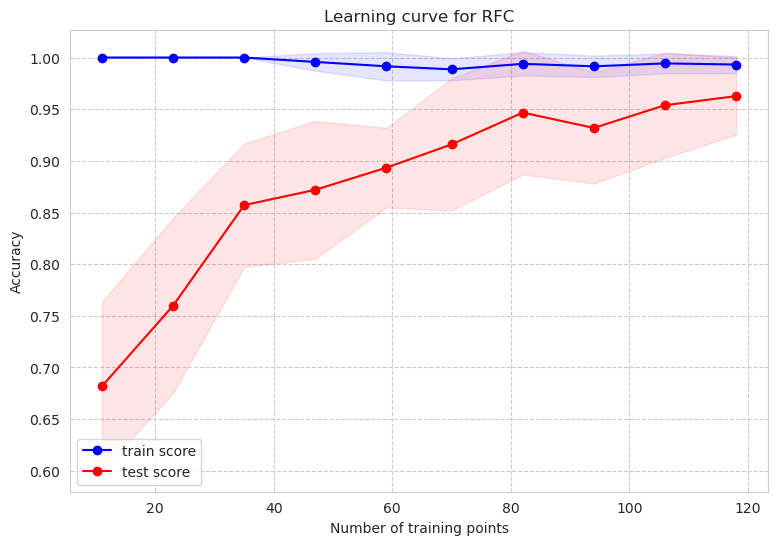

In [167]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
    estimator= grid_rfc.best_estimator_ ,
    X= X_train, y = y_train, 
    train_sizes=np.arange(0.1,1.1,0.1),
    cv= 10,  
    scoring='accuracy', 
    n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RFC')